<a href="https://colab.research.google.com/github/Abhijith-py/supervised-machinelearning/blob/main/multi-variable-linear-regression-with-gradient-descent-and-feature-scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multi variable Linear Regression with Gradient Descent and feature scaling - Coursera**

automate the process of optimizing w and b using gradient descent

In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

The training dataset contains three examples with four features (size, bedrooms, floors and, age)


In [2]:
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [3]:
def z_score_normalize(x):
  mu= np.mean(x, axis = 0)
  sigma = np.std(x, axis =0)
  x_norm = (x-mu)/sigma

  return (x_norm, mu, sigma)


In [4]:
#normalizing thr values of x

x_norm, mu, sigma = z_score_normalize(x_train)
print(x_norm)

[[ 1.26311506  1.33630621 -0.70710678  1.22474487]
 [-0.08073519 -0.26726124  1.41421356  0.        ]
 [-1.18237987 -1.06904497 -0.70710678 -1.22474487]]


In [5]:
#defining a function to calculate cost
def compute_cost(x, y, w, b):
  m = x.shape[0]
  cost = 0
  for i in range(m):
    f_wb_i = np.dot(x[i],w) + b
    cost = cost + (f_wb_i- y[i])**2
    cost = 1/(2*m) * cost

  return cost


In [6]:
def compute_gradient(x,y,w,b):
  m,n = x.shape
  dj_dw = np.zeros((n,))
  dj_db = 0

  for i in range(m):
    err = (np.dot(x[i],w) + b) - y[i]
    for j in range(n):
      dj_dw[j] = dj_dw[j] + err*x[i,j]
      dj_db = dj_db + err

      dj_dw = dj_dw/m
      dj_db = dj_db/m

  return dj_dw, dj_db



In [7]:
#defining a function to calculate cost
def compute_cost(x, y, w, b):
  m = x.shape[0]
  cost = 0
  for i in range(m):
    f_wb_i = np.dot(x[i],w) + b
    cost = cost + (f_wb_i- y[i])**2
    cost = 1/(2*m) * cost

  return cost


In [8]:
def compute_gradient(x,y,w,b):
  m,n = x.shape
  dj_dw = np.zeros((n,))
  dj_db = 0

  for i in range(m):
    err = (np.dot(x[i],w) + b) - y[i]
    for j in range(n):
      dj_dw[j] = dj_dw[j] + err*x[i,j]
      dj_db = dj_db + err

      dj_dw = dj_dw/m
      dj_db = dj_db/m

  return dj_dw, dj_db



In [9]:
def gradient_descent(x,y,w_in,b_in,alpha,num_iters,compute_cost,compute_gradient):

  w=copy.deepcopy(w_in)
  b=b_in
  j_history = []


  for i in range(num_iters):
    dj_dw,dj_db = compute_gradient(x,y,w,b)
    w = w - alpha*dj_dw
    b = b - alpha*dj_db

    if i < 100000:
      j_history.append(compute_cost(x,y,w,b))

    if i%math.ceil(num_iters/10) == 0:
      print(f"Iteration {i:4d}: Cost: {j_history[-1]:8.2f}")

  return w,b,j_history

In [10]:
w_init = np.zeros(4)
b_init = 0
tmp_alpha = 0.1
num_iters = 10000

w_final, b_final, J_hist = gradient_descent(x_norm,y_train,w_init,b_init,tmp_alpha,num_iters,compute_cost,compute_gradient)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")


Iteration    0: Cost:  6552.63
Iteration 1000: Cost:   922.72
Iteration 2000: Cost:   665.33
Iteration 3000: Cost:   572.53
Iteration 4000: Cost:   529.95
Iteration 5000: Cost:   504.78
Iteration 6000: Cost:   486.51
Iteration 7000: Cost:   471.35
Iteration 8000: Cost:   457.76
Iteration 9000: Cost:   445.08
b,w found by gradient descent: 188.86,[-0.44443817 -2.71234375 31.63982422 -6.5917801 ] 


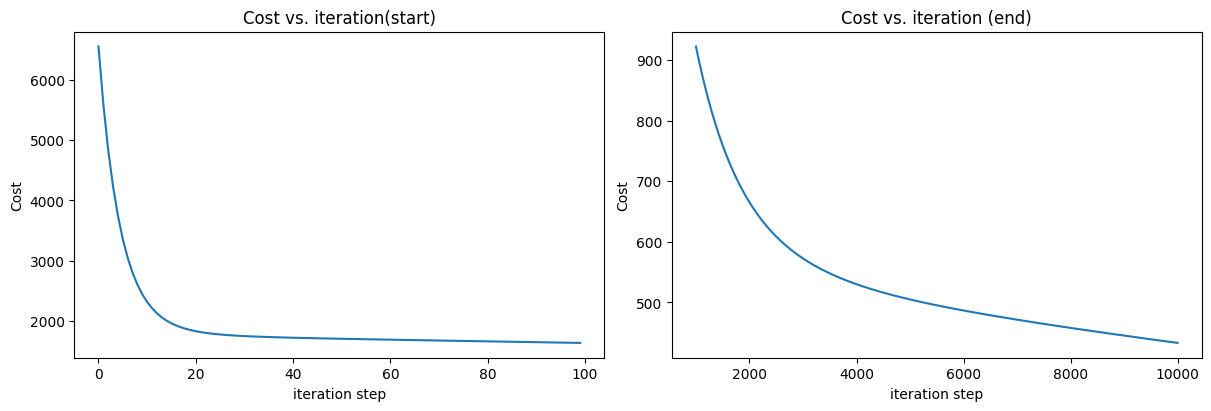

In [11]:
#cost vs iteration check to see if j is converging
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()

In [12]:
# To make prediction
def predict(x, w, b, mu, sigma):

    x_scaled = (x - mu) / sigma

    return np.dot(x_scaled, w) + b

x_test_value = np.array([1200, 2, 1, 10])


prediction_for_new_house_2 = predict(x_test_value, w_final, b_final, mu, sigma)

print(f"Prediction for a house with features {x_test_value}: {prediction_for_new_house_2:0.2f}")

Prediction for a house with features [1200    2    1   10]: 218.05
